reading the network file  : HVR_7.txt
reading the metadata file : metadata_CysPoLV.txt



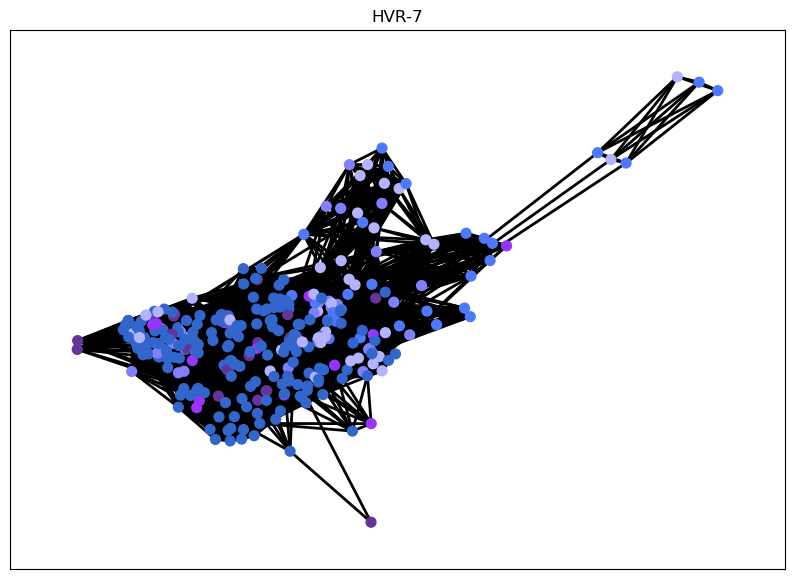

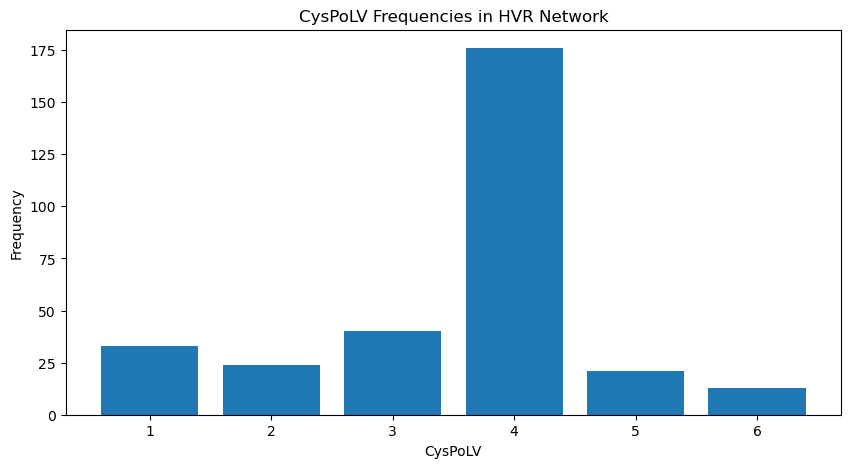

number of nodes, n  = 306
number of edges, m  = 11688
mean degree,    <k> = 76.39
clustering coefficient, C     =  0.64
mean geodesic distance, <ell> =  1.91


In [2]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import sys
from sklearn import metrics
from scipy.stats import ttest_ind

def draw_network_with_colors(graph, node_labels):

    label_colors = ['#4d79ff', '#8080ff', '#b3b3ff', '#3366cc', '#663399', '#9933ff', '#cc66ff']
    node_colors = [label_colors[int(node_labels[node]) - 1] for node in graph.nodes()]
    node_size = 600
    show_labels = True

    if graph.order() > 50:
        node_size = 50
        show_labels = False

    plt.figure(figsize=(10, 7))

    nx.draw_networkx(
        graph,
        with_labels=show_labels,
        node_size=node_size,
        width=2,
        node_color=node_colors
    )
    plt.title("HVR-7")
    plt.show()
    return

fname1 = 'HVR_7.txt'
fname2 = 'metadata_CysPoLV.txt'

print(f'reading the network file  : {fname1}')
G = nx.read_edgelist('./' + fname1, delimiter=',', nodetype=int)  # import simple graph, index nodes by integers (not strings)

# read in the node metadata
print(f'reading the metadata file : {fname2}\n')
f = open('./' + fname2,'r')
labels = []
for line in f:
    labels.append(int(line.rstrip('\n'))) 
f.close() 

z = {}
for i in range(0,len(labels)):
    if i+1 in G.nodes():
        z[i+1] = labels[i] 

n = G.order() #number of nodes
m = G.size() #number of edges
kmean = (2*m)/n #mean degree
C = nx. transitivity(G) #clustering coeff
ellmean = nx.average_shortest_path_length(G) #geodesic distance
#plotting ridiculogram
draw_network_with_colors(G, z)
#plotting the attribute frequencies in a bar graph
# print(labels)
attribute_frequency = {key: labels.count(key) for key in labels} #learnt this key thing from here https://www.geeksforgeeks.org/python-frequency-of-elements-from-other-list/
#print(attribute_frequency)
plt.figure(figsize=(10,5))
plt.bar(attribute_frequency.keys(), attribute_frequency.values())
plt.xlabel('CysPoLV')
plt.ylabel('Frequency')
plt.title('CysPoLV Frequencies in HVR Network')
plt.show()
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)

def predict_baseline(x):
    xobs = list(x.values())
    xval = [lab for lab in xobs if lab>0]
    xpred = xval[int(rnd.random()*len(xval))]
    return xpred

#using local smoothing to get missing data and reduce vague parts 
def predictLabel_local(G,i,x,flag):
    xnu = []
    for j in G.neighbors(i):
        if x[j]>0:
            xnu.append(x[j])
    if not xnu:
        xpred = predictLabel_baseline(x)
        if flag == 1:
            print(baseliune)
        else:
            xpred = max(sex(xnu), key=xnu.count)        
    return xpred


def compute_ACC_onG(G,x,alpha):

    xo = x.copy()
    xp = x.copy()
    for i in xp:
        xp[i] = 0

    for i in G.nodes():
        if rnd.random() > alpha:
            xo[i] = -1
            xp[i] = predictLabel_local(G,i,xo, 1)

    observed_idx = []
    for i in xo:
        if xo[i] == -1:
            observed_idx.append(i)
    true_labels = []
    predicted_labels = []
    for i in observed_idx:
        true_labels.append(x[i])
    for i in observed_idx:
        predicted_labels.append(xp[i])
    c = metrics.confusion_matrix(true_labels, predicted_labels)
    correct_predictions = np.trace(c)
    total_observed = np.sum(c)
    acc = correct_predictions/total_observed
    
    return acc
  
    

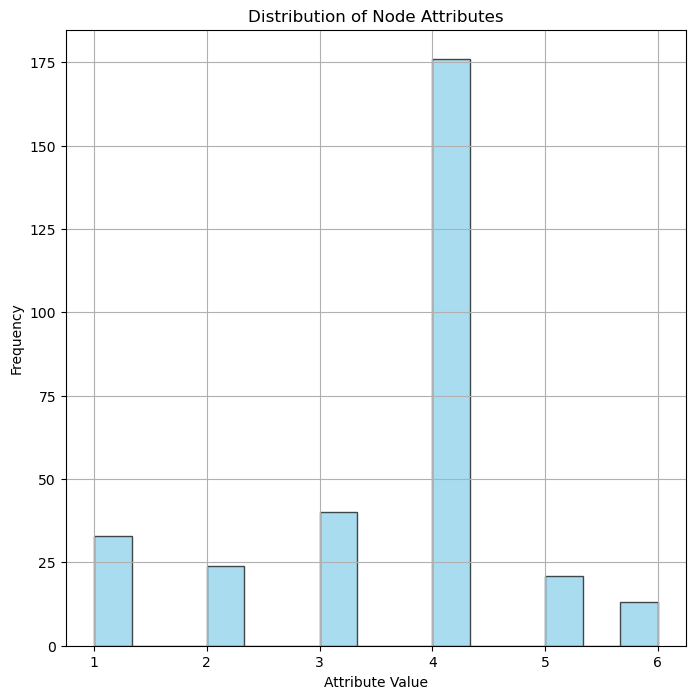

Correlation coefficient between attribute labels and degree centrality: 0.3185746312209353
Subset 1: Mean degree centrality: 0.1458519622454049, Standard deviation: 0.12303026732601134
Subset 2: Mean degree centrality: 0.20409836065573772, Standard deviation: 0.11022380789037033
Subset 3: Mean degree centrality: 0.21524590163934426, Standard deviation: 0.1238210731515826
Subset 4: Mean degree centrality: 0.2861639344262295, Standard deviation: 0.10377814031474553
Subset 5: Mean degree centrality: 0.2548009367681499, Standard deviation: 0.11684344344543139
Subset 6: Mean degree centrality: 0.22244640605296345, Standard deviation: 0.10711636215633802
ANOVA F-statistic: 11.210630821208769, p-value: 6.38810619720337e-10


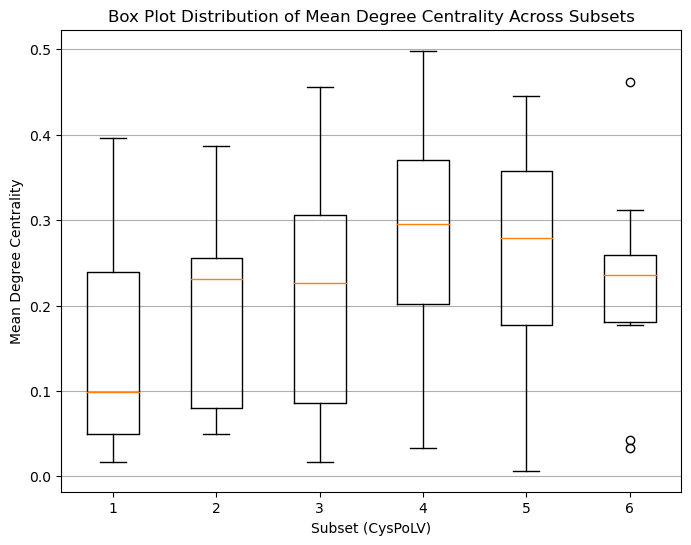

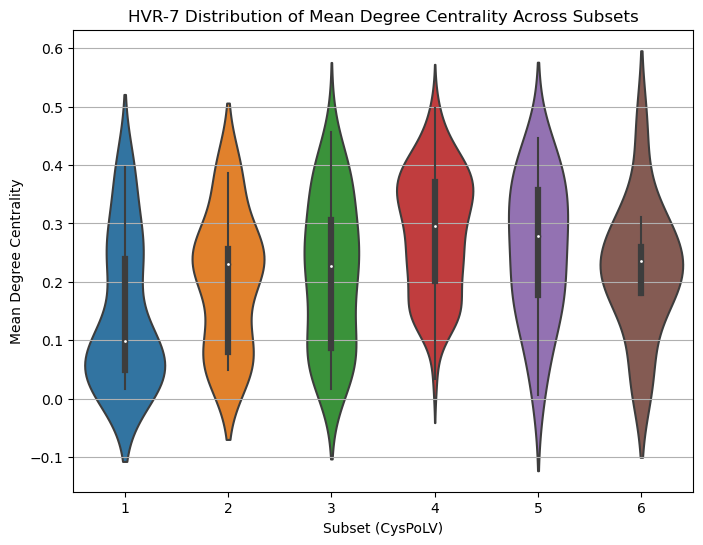

T-statistic for subsets 1 and 2: -1.8103553566291923, p-value: 0.07570470294944269
T-statistic for subsets 1 and 3: -2.3570767832300654, p-value: 0.021180843390694
T-statistic for subsets 1 and 4: -6.872236173570676, p-value: 7.364461381350664e-11
T-statistic for subsets 1 and 5: -3.1741483853400694, p-value: 0.0025247823258108147
T-statistic for subsets 1 and 6: -1.9264758065254635, p-value: 0.060519717365710865
T-statistic for subsets 2 and 3: -0.35738180702156797, p-value: 0.7220196677470023
T-statistic for subsets 2 and 4: -3.5869991182365606, p-value: 0.00042194814279389634
T-statistic for subsets 2 and 5: -1.4631977114224588, p-value: 0.15068515492302237
T-statistic for subsets 2 and 6: -0.47479611383038983, p-value: 0.6378816766934552
T-statistic for subsets 3 and 4: -3.7366302063838375, p-value: 0.00023954406443269205
T-statistic for subsets 3 and 5: -1.1884730244347306, p-value: 0.2394089733313289
T-statistic for subsets 3 and 6: -0.18446439380118146, p-value: 0.85438071458599

In [3]:
from scipy.stats import ttest_ind

attribute_mean = np.mean(labels)
attribute_std = np.std(labels)

# Visualize attribute distribution
plt.figure(figsize=(8, 8))
plt.hist(labels, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Attribute Value')
plt.ylabel('Frequency')
plt.title('Distribution of Node Attributes')
plt.grid(True)
plt.show()

degree_centrality = nx.degree_centrality(G)
degree_centrality_values = [degree_centrality[node] for node in G.nodes() if node in degree_centrality]
correlation_coefficient = np.corrcoef(labels[:len(degree_centrality_values)], degree_centrality_values)[0, 1]
print(f"Correlation coefficient between attribute labels and degree centrality: {correlation_coefficient}")


from scipy.stats import f_oneway

subset_degree_centralities = []

# Iterate over the first 6 subsets (HVRs) and compute the mean degree centrality
for i in range(1, 7):  # Considering subsets 1 to 6
    subset_nodes = [node for node in G.nodes() if z[node] == i]
    if subset_nodes:
        subset_degree = [degree_centrality[node] for node in subset_nodes]
        subset_degree_centralities.append(subset_degree)
        mean_degree = np.mean(subset_degree)
        std_degree = np.std(subset_degree)
        print(f"Subset {i}: Mean degree centrality: {mean_degree}, Standard deviation: {std_degree}")
    else:
        print(f"No nodes found in subset {i}")

# Filter out empty arrays
subset_degree_centralities = [x for x in subset_degree_centralities if x]

# Perform ANOVA test to compare mean degree centralities across subsets
if len(subset_degree_centralities) >= 2:
    f_statistic, p_value_anova = f_oneway(*subset_degree_centralities)
    print(f"ANOVA F-statistic: {f_statistic}, p-value: {p_value_anova}")
else:
    print("Insufficient data to perform ANOVA test.")

# Visualize the distribution of mean degree centralities across subsets
plt.figure(figsize=(8, 6))
plt.boxplot(subset_degree_centralities)
plt.xlabel('Subset (CysPoLV)')
plt.ylabel('Mean Degree Centrality')
plt.title('Box Plot Distribution of Mean Degree Centrality Across Subsets')
plt.xticks(range(1, len(subset_degree_centralities) + 1), range(1, len(subset_degree_centralities) + 1))
plt.grid(axis='y')
plt.show()

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(data=subset_degree_centralities)
plt.xlabel('Subset (CysPoLV)')
plt.ylabel('Mean Degree Centrality')
plt.title('HVR-7 Distribution of Mean Degree Centrality Across Subsets')
plt.xticks(range(0, len(subset_degree_centralities)), range(1, len(subset_degree_centralities) + 1))
plt.grid(axis='y')
plt.show()

# Perform statistical tests (e.g., t-test) to compare subsets
# Perform statistical tests (e.g., t-test) to compare subsets
for i in range(1, 7):
    for j in range(i+1, 7):
        subset1_nodes = [node for node in G.nodes() if z[node] == i]
        subset2_nodes = [node for node in G.nodes() if z[node] == j]
        if subset1_nodes and subset2_nodes:
            t_statistic, p_value = ttest_ind([degree_centrality[node] for node in subset1_nodes], 
                                             [degree_centrality[node] for node in subset2_nodes])
            print(f"T-statistic for subsets {i} and {j}: {t_statistic}, p-value: {p_value}")
        else:
            print(f"Insufficient data to perform t-test between subsets {i} and {j}")

In [5]:
from tabulate import tabulate

# Data for subsets
subsets = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4', 'Subset 5', 'Subset 6']
mean_degrees = [0.1458519622454049, 0.20409836065573772, 0.21524590163934426, 
                0.2861639344262295, 0.2548009367681499, 0.22244640605296345]
std_deviations = [0.12303026732601134, 0.11022380789037033, 0.1238210731515826, 
                  0.10377814031474553, 0.11684344344543139, 0.10711636215633802]

# Prepare data for tabulate
table_data = []
for subset, mean_degree, std_dev in zip(subsets, mean_degrees, std_deviations):
    table_data.append([subset, mean_degree, std_dev])

# Print the table
table = tabulate(table_data, headers=['Subset', 'Mean Degree Centrality', 'Standard Deviation'], tablefmt='pipe')
print(table)


| Subset   |   Mean Degree Centrality |   Standard Deviation |
|:---------|-------------------------:|---------------------:|
| Subset 1 |                 0.145852 |             0.12303  |
| Subset 2 |                 0.204098 |             0.110224 |
| Subset 3 |                 0.215246 |             0.123821 |
| Subset 4 |                 0.286164 |             0.103778 |
| Subset 5 |                 0.254801 |             0.116843 |
| Subset 6 |                 0.222446 |             0.107116 |


In [6]:
from tabulate import tabulate

# List to hold the results
results_table = []

# Populate the results table
for i in range(1, 7):
    for j in range(i+1, 7):
        subset1_nodes = [node for node in G.nodes() if z[node] == i]
        subset2_nodes = [node for node in G.nodes() if z[node] == j]
        if subset1_nodes and subset2_nodes:
            t_statistic, p_value = ttest_ind([degree_centrality[node] for node in subset1_nodes], 
                                             [degree_centrality[node] for node in subset2_nodes])
            results_table.append([f"Subsets {i} and {j}", f"{t_statistic:.4f}", f"{p_value:.4f}"])

# Print the formatted table
print(tabulate(results_table, headers=["Subset Comparison", "T-statistic", "P-value"]))

Subset Comparison      T-statistic    P-value
-------------------  -------------  ---------
Subsets 1 and 2            -1.8104     0.0757
Subsets 1 and 3            -2.3571     0.0212
Subsets 1 and 4            -6.8722     0
Subsets 1 and 5            -3.1741     0.0025
Subsets 1 and 6            -1.9265     0.0605
Subsets 2 and 3            -0.3574     0.722
Subsets 2 and 4            -3.587      0.0004
Subsets 2 and 5            -1.4632     0.1507
Subsets 2 and 6            -0.4748     0.6379
Subsets 3 and 4            -3.7366     0.0002
Subsets 3 and 5            -1.1885     0.2394
Subsets 3 and 6            -0.1845     0.8544
Subsets 4 and 5             1.2836     0.2008
Subsets 4 and 6             2.1196     0.0354
Subsets 5 and 6             0.7856     0.4379


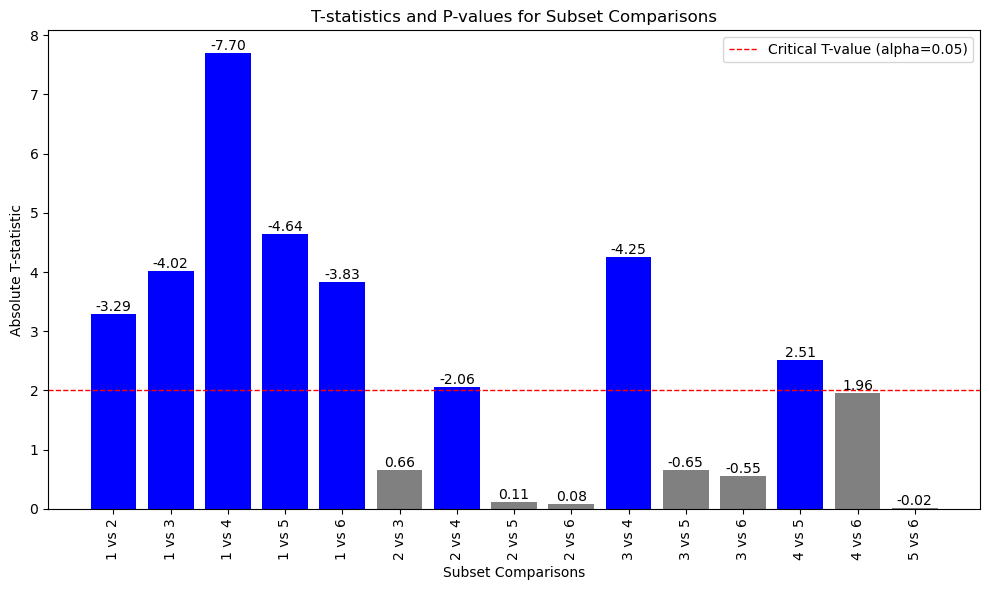

In [26]:
# Extract data from the table
subset_comparisons = ["1 vs 2", "1 vs 3", "1 vs 4", "1 vs 5", "1 vs 6",
                      "2 vs 3", "2 vs 4", "2 vs 5", "2 vs 6",
                      "3 vs 4", "3 vs 5", "3 vs 6",
                      "4 vs 5", "4 vs 6", "5 vs 6"]
t_statistics = [-3.294, -4.0169, -7.6975, -4.6406, -3.8299,
                0.6561, -2.0625, 0.1142, 0.0755,
                -4.2493, -0.6543, -0.5468,
                2.5106, 1.9588, -0.0207]
p_values = [0.0019, 0.0001, 0, 0, 0, 0.5144, 0.0405, 0.9097, 0.9403,
            0, 0.5154, 0.5869, 0.0129, 0.0516, 0.9836]

# Set significance levels
alpha = 0.05
significant_color = 'blue'
non_significant_color = 'gray'

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(subset_comparisons, np.abs(t_statistics), color=[significant_color if p < alpha else non_significant_color for p in p_values])

# Add labels and titles
plt.xlabel('Subset Comparisons')
plt.ylabel('Absolute T-statistic')
plt.title('T-statistics and P-values for Subset Comparisons')
plt.xticks(rotation=90)
plt.axhline(y=2, color='r', linestyle='--', linewidth=1, label='Critical T-value (alpha=0.05)')
plt.legend()

# Add the actual value above each bar
for bar, t_statistic in zip(bars, t_statistics):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{t_statistic:.2f}', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()